In [1]:
# # Install necessary packages
# !pip install language-tool-python
# !pip install demoji
# !pip install emoji
# !pip install spacy
# !pip install afinn
# !pip install transformers
# !pip install torch  # For PyTorch
# !pip install tensorflow
# !pip install pyLDAvis
# !pip install thefuzz
# !pip install nltk
# !pip install requests
# !pip install pyLDAvis
# !pip install matplotlib
# !pip install gensim

In [2]:

# Download necessary models and resources
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

# Grammar Checker
import language_tool_python

# Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Word Cloud and Visualization
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from textblob import TextBlob
from afinn import Afinn
import spacy
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
# import pyLDAvis.gensim_models as gensimvis


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('all')  # This downloads all NLTK data, may be excessive

# Model and Metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fuzzy Matching
from thefuzz import fuzz
from thefuzz import process

     ---------------------------------------- 12.8/12.8 MB 6.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 42.8/42.8 MB 4.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    

In [136]:
corpus = ("Video provides a powerful way to help you prove your point. When you click Online Video, you can paste in the embed code for the video you want to add. You can also type a keyword to search online for the video that best fits your document. To make your document look professionally produced, Word provides header, footer, cover page, and text box designs that complement each other. For example, you can add a matching cover page, header, and sidebar. Click Insert and then choose the elements you want from the different galleries. Themes and styles also help keep your document coordinated. When you click Design and choose a new Theme, the pictures, charts, and SmartArt graphics change to match your new theme. When you apply styles, your headings change to match the new theme. Save time in Word with new buttons that show up where you need them. To change the way a picture fits in your document, click it and a button for layout options appears next to it. When you work on a table, click where you want to add a row or a column, and then click the plus sign. Reading is easier, too, in the new Reading view. You can collapse parts of the document and focus on the text you want. If you need to stop reading before you reach the end, Word remembers where you left off - even on another device.")

# Data Processing
- Lowercasing
- Punctuation Removal
- Numerical Data Removal

In [137]:
# lower casing
corpus = corpus.lower()
print(corpus)

video provides a powerful way to help you prove your point. when you click online video, you can paste in the embed code for the video you want to add. you can also type a keyword to search online for the video that best fits your document. to make your document look professionally produced, word provides header, footer, cover page, and text box designs that complement each other. for example, you can add a matching cover page, header, and sidebar. click insert and then choose the elements you want from the different galleries. themes and styles also help keep your document coordinated. when you click design and choose a new theme, the pictures, charts, and smartart graphics change to match your new theme. when you apply styles, your headings change to match the new theme. save time in word with new buttons that show up where you need them. to change the way a picture fits in your document, click it and a button for layout options appears next to it. when you work on a table, click whe

In [138]:
# punctuation removal
pattern = re.compile(r'[^\w\s]')
corpus = pattern.sub('',corpus)
print(corpus)

video provides a powerful way to help you prove your point when you click online video you can paste in the embed code for the video you want to add you can also type a keyword to search online for the video that best fits your document to make your document look professionally produced word provides header footer cover page and text box designs that complement each other for example you can add a matching cover page header and sidebar click insert and then choose the elements you want from the different galleries themes and styles also help keep your document coordinated when you click design and choose a new theme the pictures charts and smartart graphics change to match your new theme when you apply styles your headings change to match the new theme save time in word with new buttons that show up where you need them to change the way a picture fits in your document click it and a button for layout options appears next to it when you work on a table click where you want to add a row 

In [139]:
# digit removal
pattern = re.compile(r'\d')
corpus = pattern.sub('',corpus)
print(corpus)

video provides a powerful way to help you prove your point when you click online video you can paste in the embed code for the video you want to add you can also type a keyword to search online for the video that best fits your document to make your document look professionally produced word provides header footer cover page and text box designs that complement each other for example you can add a matching cover page header and sidebar click insert and then choose the elements you want from the different galleries themes and styles also help keep your document coordinated when you click design and choose a new theme the pictures charts and smartart graphics change to match your new theme when you apply styles your headings change to match the new theme save time in word with new buttons that show up where you need them to change the way a picture fits in your document click it and a button for layout options appears next to it when you work on a table click where you want to add a row 

# Tokenization

In [140]:
tokens = corpus.split(" ")
print(tokens)
print(len(tokens))

['video', 'provides', 'a', 'powerful', 'way', 'to', 'help', 'you', 'prove', 'your', 'point', 'when', 'you', 'click', 'online', 'video', 'you', 'can', 'paste', 'in', 'the', 'embed', 'code', 'for', 'the', 'video', 'you', 'want', 'to', 'add', 'you', 'can', 'also', 'type', 'a', 'keyword', 'to', 'search', 'online', 'for', 'the', 'video', 'that', 'best', 'fits', 'your', 'document', 'to', 'make', 'your', 'document', 'look', 'professionally', 'produced', 'word', 'provides', 'header', 'footer', 'cover', 'page', 'and', 'text', 'box', 'designs', 'that', 'complement', 'each', 'other', 'for', 'example', 'you', 'can', 'add', 'a', 'matching', 'cover', 'page', 'header', 'and', 'sidebar', 'click', 'insert', 'and', 'then', 'choose', 'the', 'elements', 'you', 'want', 'from', 'the', 'different', 'galleries', 'themes', 'and', 'styles', 'also', 'help', 'keep', 'your', 'document', 'coordinated', 'when', 'you', 'click', 'design', 'and', 'choose', 'a', 'new', 'theme', 'the', 'pictures', 'charts', 'and', 'smart

# Stop word Removal

In [141]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]
print(filtered_tokens)
print(len(filtered_tokens))

['video', 'provides', 'powerful', 'way', 'help', 'prove', 'point', 'click', 'online', 'video', 'paste', 'embed', 'code', 'video', 'want', 'add', 'also', 'type', 'keyword', 'search', 'online', 'video', 'best', 'fits', 'document', 'make', 'document', 'look', 'professionally', 'produced', 'word', 'provides', 'header', 'footer', 'cover', 'page', 'text', 'box', 'designs', 'complement', 'example', 'add', 'matching', 'cover', 'page', 'header', 'sidebar', 'click', 'insert', 'choose', 'elements', 'want', 'different', 'galleries', 'themes', 'styles', 'also', 'help', 'keep', 'document', 'coordinated', 'click', 'design', 'choose', 'new', 'theme', 'pictures', 'charts', 'smartart', 'graphics', 'change', 'match', 'new', 'theme', 'apply', 'styles', 'headings', 'change', 'match', 'new', 'theme', 'save', 'time', 'word', 'new', 'buttons', 'show', 'need', 'change', 'way', 'picture', 'fits', 'document', 'click', 'button', 'layout', 'options', 'appears', 'next', 'work', 'table', 'click', 'want', 'add', 'row

# Stemming

In [142]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(tokens) for tokens in filtered_tokens]

[stemmer.stem(token) for token in filtered_tokens]

print(stemmed_tokens)
print(len(stemmed_tokens))

['video', 'provid', 'power', 'way', 'help', 'prove', 'point', 'click', 'onlin', 'video', 'past', 'emb', 'code', 'video', 'want', 'add', 'also', 'type', 'keyword', 'search', 'onlin', 'video', 'best', 'fit', 'document', 'make', 'document', 'look', 'profession', 'produc', 'word', 'provid', 'header', 'footer', 'cover', 'page', 'text', 'box', 'design', 'complement', 'exampl', 'add', 'match', 'cover', 'page', 'header', 'sidebar', 'click', 'insert', 'choos', 'element', 'want', 'differ', 'galleri', 'theme', 'style', 'also', 'help', 'keep', 'document', 'coordin', 'click', 'design', 'choos', 'new', 'theme', 'pictur', 'chart', 'smartart', 'graphic', 'chang', 'match', 'new', 'theme', 'appli', 'style', 'head', 'chang', 'match', 'new', 'theme', 'save', 'time', 'word', 'new', 'button', 'show', 'need', 'chang', 'way', 'pictur', 'fit', 'document', 'click', 'button', 'layout', 'option', 'appear', 'next', 'work', 'tabl', 'click', 'want', 'add', 'row', 'column', 'click', 'plu', 'sign', 'read', 'easier', '

# POS Tagging

In [143]:
NLP = spacy.load('en_core_web_sm')
doc = NLP(corpus)

# Lemmatization

In [144]:
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
print(lemmatized_tokens)

['video', 'provide', 'powerful', 'way', 'help', 'prove', 'point', 'click', 'online', 'video', 'paste', 'embed', 'code', 'video', 'want', 'add', 'type', 'keyword', 'search', 'online', 'video', 'good', 'fit', 'document', 'document', 'look', 'professionally', 'produce', 'word', 'provide', 'header', 'footer', 'cover', 'page', 'text', 'box', 'design', 'complement', 'example', 'add', 'matching', 'cover', 'page', 'header', 'sidebar', 'click', 'insert', 'choose', 'element', 'want', 'different', 'gallery', 'theme', 'style', 'help', 'document', 'coordinate', 'click', 'design', 'choose', 'new', 'theme', 'picture', 'chart', 'smartart', 'graphic', 'change', 'match', 'new', 'theme', 'apply', 'style', 'heading', 'change', 'match', 'new', 'theme', 'save', 'time', 'word', 'new', 'button', 'need', 'change', 'way', 'picture', 'fit', 'document', 'click', 'button', 'layout', 'option', 'appear', 'work', 'table', 'click', 'want', 'add', 'row', 'column', 'click', 'plus', 'sign', 'reading', 'easy', 'new', 'rea

# WordCloud

In [161]:
plt.rcParams['figure.dpi'] == 300

False

In [162]:
word_frequency = Counter(lemmatized_tokens)

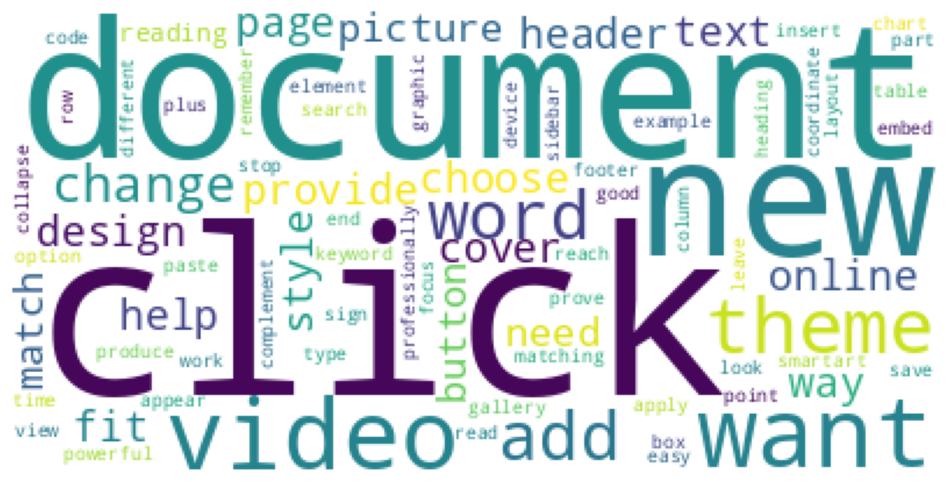

In [166]:
word_cloud = WordCloud(background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Demojication

In [5]:
import emoji
emoji_mapped = emoji.demojize(corpus)
print(emoji_mapped)

ModuleNotFoundError: No module named 'emoji'

# Sentimental Analysis

In [6]:
documents = [
    "I can't believe how amazing this product is! It's completely changed my life for the better.",
    "The customer service was absolutely terrible, and I regret ever purchasing from this company.",
    "Life has been really tough lately, but I'm starting to see a bit of light at the end of the tunnel.",
    "This place has the best food I've ever tasted, and the ambiance was perfect for a romantic evening.",
    "I'm beyond disappointed. Everything went wrong, and nothing turned out the way it should have.",
    "I feel so grateful for all the love and support I've received. It's a blessing to have people who care.",
    "I don't understand why everything always seems to fall apart for me. I'm lost and don't know where to turn.",
    "The service was prompt, the food was cold, but hey, at least the drinks were cheap."
]

In [29]:
df = pd.DataFrame(documents, columns=['document'])

In [30]:
df

,document
0,I can't believe how amazing this product is! I...
1,"The customer service was absolutely terrible, ..."
2,"Life has been really tough lately, but I'm sta..."
3,"This place has the best food I've ever tasted,..."
4,I'm beyond disappointed. Everything went wrong...
5,I feel so grateful for all the love and suppor...
6,I don't understand why everything always seems...
7,"The service was prompt, the food was cold, but..."


In [16]:
!pip install afinn

In [17]:
from afinn import Afinn

In [18]:
afinn = Afinn()

In [19]:
def sentiment_analyser(text: str) -> str:
    afinn = Afinn()
    score = afinn.score(text)
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [27]:
sentiment_analyser("ok")

'Neutral'

In [32]:
df['document'].apply(sentiment_analyser)

0    Positive
1    Negative
2     Neutral
3    Positive
4    Negative
5    Positive
6    Negative
7     Neutral
Name: document, dtype: object

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
sia = SentimentIntensityAnalyzer()

In [35]:
sia.polarity_scores("good")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [36]:
def get_polarity_score(text:str) -> str:
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

In [37]:
get_polarity_score("goodness is the root of all evil but all evils are certainly not good")

{'neg': 0.435, 'neu': 0.361, 'pos': 0.204, 'compound': -0.7756}

In [39]:
df['sentiment'] = df['document'].apply(get_polarity_score)

# Named Entity Recognition

In [49]:
text = "Ratan Tata died today on 10th October 2024 and he was very rich and probably had $100 Billion Dollars"
NLP = spacy.load('en_core_web_sm')
doc = NLP(text)

In [50]:
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

Ratan Tata: ORG
today: DATE
10th October 2024: DATE
$100 Billion Dollars: MONEY


# Similarity Checker

In [51]:
def checkSimilarity(text1: str, text2: str):
    synset1 = wordnet.synsets(text1)[0]
    synset2 = wordnet.synsets(text2)[0]
    return synset1.wup_similarity(synset2)

In [53]:
checkSimilarity("Person", "Driver")

0.6666666666666666

In [54]:
def checkSentenceSimilarity(sentence1: str, sentence2: str):
    doc1 = NLP(sentence1)
    doc2 = NLP(sentence2)
    return doc1.similarity(doc2)

In [56]:
checkSentenceSimilarity("The cat is pet", "The car is vehicle")

C:\Users\Asif Sayyed\AppData\Local\Temp\ipykernel_2216\3356665781.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


0.7428161160983641

# Grammar Checker

In [57]:
def checkGrammer(text):
    tool = language_tool_python.LanguageTool('en-US')
    print("Original:",text)
    print("Fixed:", tool.correct(text))

In [59]:
checkGrammer("She don't like to go the store because there is too much people.")

Original: She don't like to go the store because there is too much people.
Fixed: She doesn't like to go the store because there is too much people.


# Topic Modelling

In [ ]:
documents = [
    "The animated series captivated audiences with its vibrant characters and humorous storylines.",
    "Cartoon Network's iconic shows from the 90s remain beloved by fans of all ages.",
    "The art of animation has evolved significantly, blending traditional techniques with digital technology.",
    "Saturday morning cartoons were a staple of childhood entertainment for many generations.",
    "The latest cartoon movie features a heartwarming tale of friendship and adventure.",
    "The impact of World War II was felt across the globe, altering the course of history.",
    "Soldiers in the trenches faced unimaginable hardships during the war.",
    "The strategies used in modern warfare have evolved with advancements in military technology.",
    "War has profound effects on both the soldiers who fight and the civilians caught in the crossfire.",
    "The Cold War era was marked by political tension and the threat of nuclear conflict.",
    ]

### Preprocessing

In [61]:
NLP = spacy.load('en_core_web_sm')

In [65]:
def preprocess(text:str):
    text = text.lower()
    doc = NLP(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

processed_documents = [preprocess(doc) for doc in documents]

In [68]:
processed_documents

[['believe', 'amazing', 'product', 'completely', 'change', 'life', 'well'],
 ['customer',
  'service',
  'absolutely',
  'terrible',
  'regret',
  'purchase',
  'company'],
 ['life', 'tough', 'lately', 'start', 'bit', 'light', 'end', 'tunnel'],
 ['place',
  'good',
  'food',
  'taste',
  'ambiance',
  'perfect',
  'romantic',
  'evening'],
 ['disappoint', 'go', 'wrong', 'turn', 'way'],
 ['feel',
  'grateful',
  'love',
  'support',
  'receive',
  'blessing',
  'people',
  'care'],
 ['understand', 'fall', 'apart', 'lose', 'know', 'turn'],
 ['service', 'prompt', 'food', 'cold', 'hey', 'drink', 'cheap']]

In [76]:
id2words = corpora.Dictionary(processed_documents)
corpus = [id2words.doc2bow(doc) for doc in processed_documents]

In [77]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(4, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(31, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [(12, 1), (23, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]]

### Modelling

In [82]:
lda = LdaModel(
    corpus=corpus, 
    id2word=id2words,
    num_topics=3,
    random_state=0,
    passes=10
    )

In [87]:
topics = lda.print_topics()

In [88]:
topics

[(0,
  '0.055*"life" + 0.055*"change" + 0.055*"amazing" + 0.055*"believe" + 0.055*"product" + 0.055*"well" + 0.055*"completely" + 0.014*"bit" + 0.014*"light" + 0.014*"lately"'),
 (1,
  '0.054*"turn" + 0.031*"food" + 0.031*"place" + 0.031*"romantic" + 0.031*"good" + 0.031*"evening" + 0.031*"ambiance" + 0.031*"taste" + 0.031*"perfect" + 0.031*"company"'),
 (2,
  '0.033*"service" + 0.033*"feel" + 0.033*"support" + 0.033*"receive" + 0.033*"blessing" + 0.033*"care" + 0.033*"love" + 0.033*"grateful" + 0.033*"people" + 0.033*"food"')]

### Visualization

In [ ]:
lda_viz = gensimvis.prepare(lda, corpus, id2words)
pyLDAviz.display(lda_viz)

### N-Grams

In [89]:
text = "Ratan Tata died today on 10th October 2024 and he was very rich and probably had $100 Billion Dollars"

tokens = text.split()

bigrams = list(ngrams(tokens, 2))

trigrams = list(ngrams(tokens, 3))

print("Bigrams :", bigrams)
print("Trigrams:", trigrams)

Bigrams : [('Ratan', 'Tata'), ('Tata', 'died'), ('died', 'today'), ('today', 'on'), ('on', '10th'), ('10th', 'October'), ('October', '2024'), ('2024', 'and'), ('and', 'he'), ('he', 'was'), ('was', 'very'), ('very', 'rich'), ('rich', 'and'), ('and', 'probably'), ('probably', 'had'), ('had', '$100'), ('$100', 'Billion'), ('Billion', 'Dollars')]
Trigrams: [('Ratan', 'Tata', 'died'), ('Tata', 'died', 'today'), ('died', 'today', 'on'), ('today', 'on', '10th'), ('on', '10th', 'October'), ('10th', 'October', '2024'), ('October', '2024', 'and'), ('2024', 'and', 'he'), ('and', 'he', 'was'), ('he', 'was', 'very'), ('was', 'very', 'rich'), ('very', 'rich', 'and'), ('rich', 'and', 'probably'), ('and', 'probably', 'had'), ('probably', 'had', '$100'), ('had', '$100', 'Billion'), ('$100', 'Billion', 'Dollars')]
